# ***Creating a VGG-16 Convolution Neural Network to Classify OCT Images***

## Defining Functions and Subroutines:

Importing Libraries:

In [2]:
pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 7.7 MB/s eta 0:00:00


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import visualkeras

from google.colab import drive
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import plot_model

Getting Directory Length Function:

In [2]:
def get_directory_length(directory):

    # List all files and directories in the given directory
    items = os.listdir(directory)

    # Return the length of the list

    return len(items)

Creating Labels Function:

In [3]:
def CreateLabels(directory,outputlength):
  os.chdir(directory)

  dir_length = get_directory_length(directory)

  dir_list = os.listdir(directory)

  labels = np.zeros((1,outputlength),dtype=int)

  for i in range(dir_length):
    new_directory = directory+"/"+dir_list[i]

    os.chdir(new_directory)

    new_dir_length = get_directory_length(new_directory)
    #new_dir_length = int(get_directory_length(new_directory)/8)

    start_index = i*dir_length
    end_index = (i+1)*dir_length

    labels[start_index:end_index,i] = 1

  return labels

In [4]:
def create_label_array(total_images, num_classes):
    labels = np.zeros((total_images, num_classes), dtype=int)
    images_per_class = total_images // num_classes

    for i in range(num_classes):
        start_index = i * images_per_class
        end_index = (i + 1) * images_per_class
        labels[start_index:end_index, i] = 1

    return labels

VGG-16 Model Creation Function:

In [5]:
def VGG11Model(input_shape, num_classes):
    model = Sequential()

    # Block 1
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 2
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 3
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 4
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 5
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Classifier
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    return model

## VGG-16 Classification of Reconstructed Data:

Mounting Google Drive:

In [6]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dataset Directories:

In [7]:
# Original Resized:
original_dir = '/content/drive/MyDrive/OCT Resized/train'
original_test_dir = '/content/drive/MyDrive/OCT Resized/test'

# Low Speckle Noise
speckle_low_dir = '/content/drive/MyDrive/OCT Low Speckle/train'
speckle_low_test_dir = '/content/drive/MyDrive/OCT Low Speckle/test'

# Medium Speckle Noise
speckle_mid_dir = '/content/drive/MyDrive/OCT Mid Speckle/train'
speckle_mid_test_dir = '/content/drive/MyDrive/OCT Mid Speckle/test'

# High Speckle Noise
speckle_high_dir = '/content/drive/MyDrive/OCT High Speckle/train'
speckle_high_test_dir = '/content/drive/MyDrive/OCT High Speckle/test'

## Low Speckle:

Creating Labels for Data: \
CNV = 1 \
DME = 2 \
DRUSEN = 3 \
NORMAL = 4 \

In [14]:
y_train = CreateLabels(speckle_low_test_dir,1000)

In [9]:
print(y_train.shape,y_train)

(1000, 4) [[1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 ...
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]]


Create Model:

In [11]:
input_shape = (200,200,1)

model = VGG11Model(input_shape,4)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 100, 100, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 50, 50, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 256)       295168    
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 256)       5

Visualize Model:

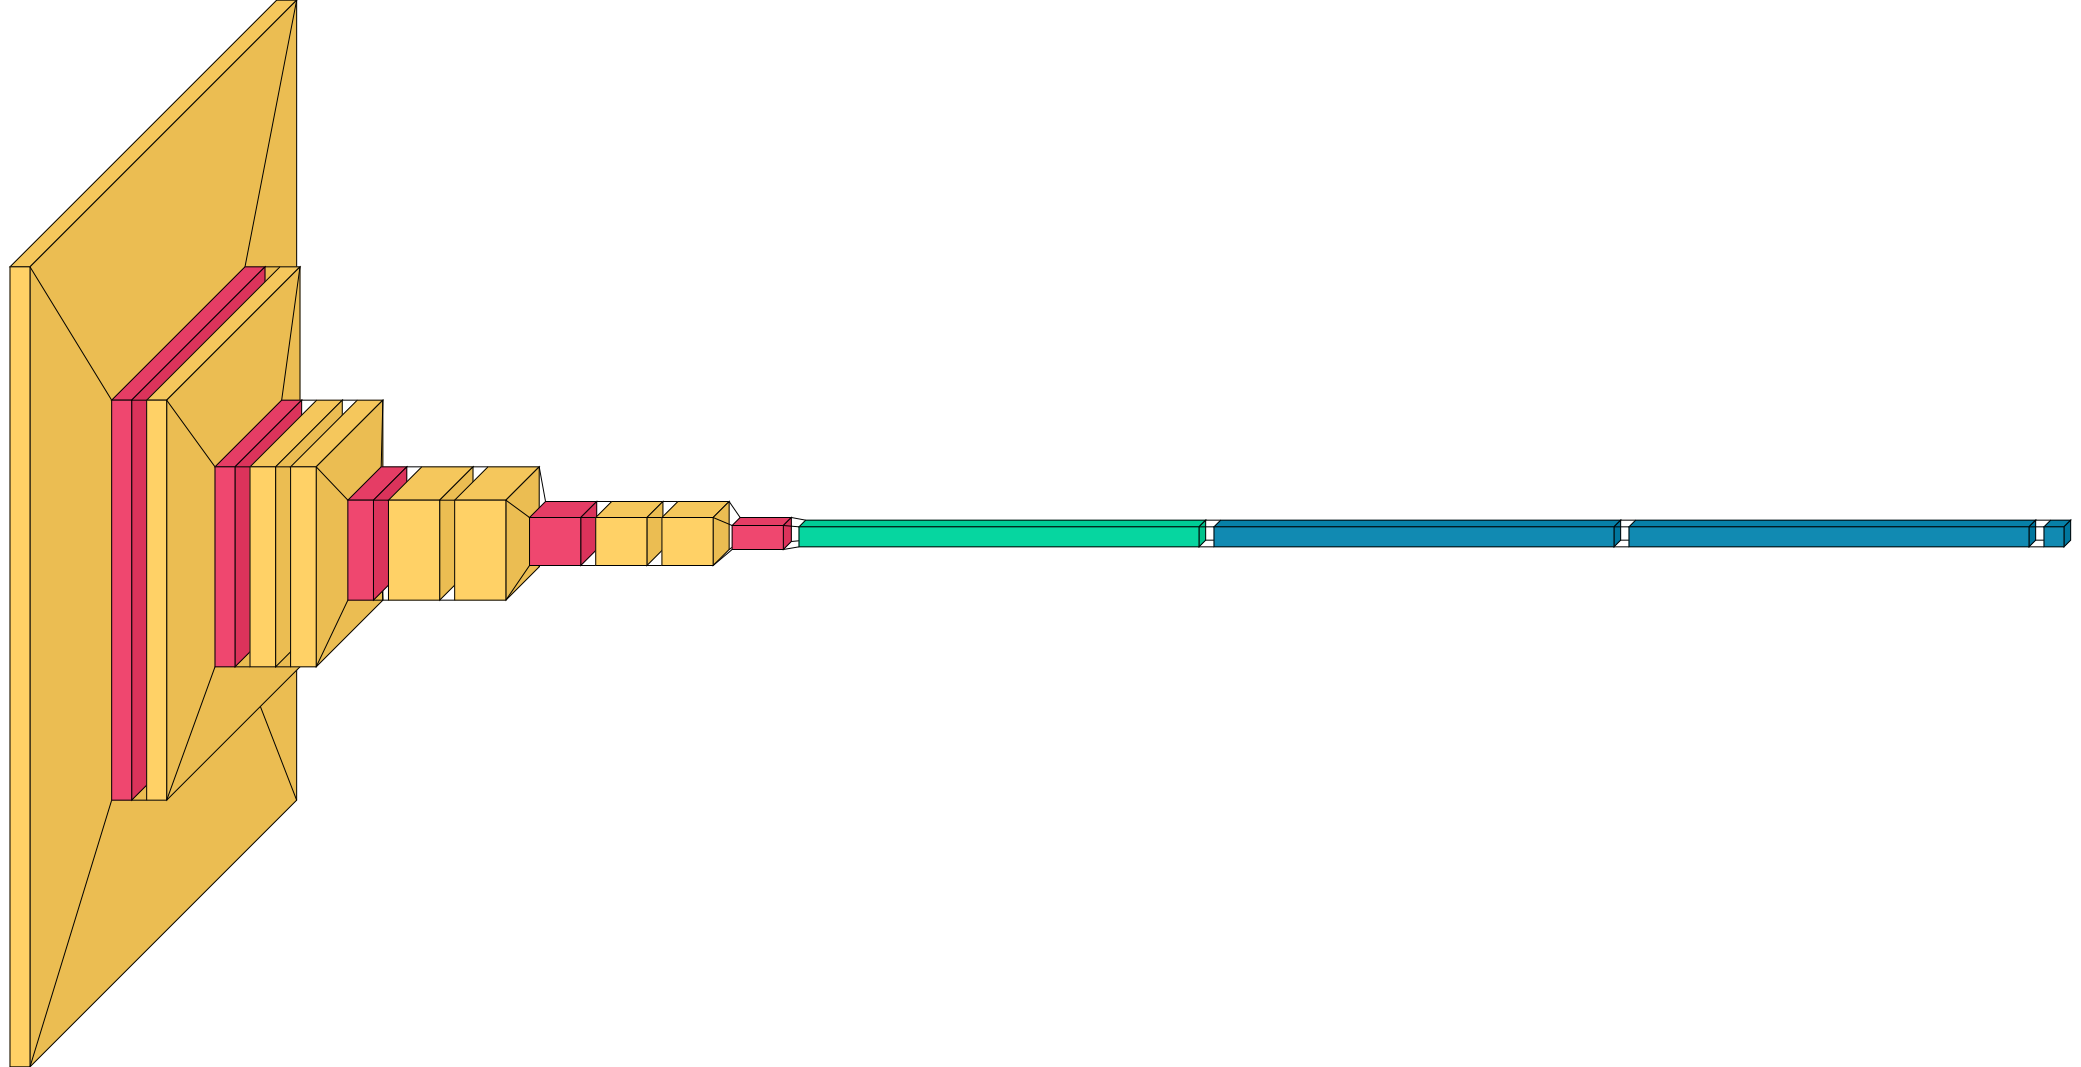

In [12]:
visualkeras.layered_view(model,spacing=15)

Fit Model:

In [13]:
speckle_low_x_train = np.load('/content/drive/MyDrive/Reconstructed Images/speckle_low_val_out.npy')

In [15]:
hist = model.fit(speckle_low_x_train,y_train,
                 epochs= 3,
                 batch_size= 32,
                 validation_split = 0.2)

Epoch 1/3
25/25 [==============================] - 853s 34s/step - loss: 1.2698 - accuracy: 0.2937 - val_loss: 2.7139 - val_accuracy: 0.0000e+00
Epoch 2/3
25/25 [==============================] - 797s 32s/step - loss: 1.2665 - accuracy: 0.3162 - val_loss: 2.4217 - val_accuracy: 0.0000e+00
Epoch 3/3
25/25 [==============================] - 796s 32s/step - loss: 1.2689 - accuracy: 0.2950 - val_loss: 3.0518 - val_accuracy: 0.0000e+00


Getting Max Accuracy:

In [16]:
max_acc_low = max(hist.history.get('accuracy'))
print(max_acc_low)

0.3162499964237213


Visualizing Accuracy and Losses:

In [ ]:
# Visualize Losses and Accuracies
# Graph 1: Traning and Validation Losses
plt.figure()
plt.plot(np.arange(12),hist.history.get('loss'),label='Training')
plt.plot(np.arange(12),hist.history.get('val_loss'),label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')

# Graph 2: Training and Validation Accuracies
plt.figure()
plt.plot(np.arange(12),hist.history.get('accuracy'),label='Training')
plt.plot(np.arange(12),hist.history.get('val_accuracy'),label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')

## Medium Speckle:

Creating Labels for Data: \
CNV = 1 \
DME = 2 \
DRUSEN = 3 \
NORMAL = 4 \

In [ ]:
y_train = CreateLabels(speckle_low_test_dir,1000)

In [ ]:
print(y_train.shape,y_train)

(1000, 4) [[1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 ...
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]]


Create Model:

In [17]:
input_shape = (200,200,1)

model = VGG11Model(input_shape,4)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 200, 200, 64)      640       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 100, 100, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 100, 100, 128)     73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 50, 50, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 50, 50, 256)       295168    
                                                                 
 conv2d_11 (Conv2D)          (None, 50, 50, 256)      

Fit Model:

In [19]:
speckle_mid_x_train = np.load('/content/drive/MyDrive/Reconstructed Images/speckle_mid_val_out.npy')

In [21]:
hist = model.fit(speckle_mid_x_train,y_val,
                 epochs= 3,
                 batch_size= 32,
                 validation_split = 0.2)

Epoch 1/3
25/25 [==============================] - 846s 34s/step - loss: 1.3671 - accuracy: 0.2925 - val_loss: 2.5047 - val_accuracy: 0.0000e+00
Epoch 2/3
25/25 [==============================] - 796s 32s/step - loss: 1.2720 - accuracy: 0.3325 - val_loss: 2.5796 - val_accuracy: 0.0000e+00
Epoch 3/3
25/25 [==============================] - 798s 32s/step - loss: 1.2707 - accuracy: 0.3025 - val_loss: 2.5701 - val_accuracy: 0.0000e+00


Getting Max Accuracy:

In [22]:
max_acc_mid = max(hist.history.get('accuracy'))
print(max_acc_mid)

0.33250001072883606


## High Speckle:

Creating Labels for Data: \
CNV = 1 \
DME = 2 \
DRUSEN = 3 \
NORMAL = 4 \

In [ ]:
y_train = CreateLabels(speckle_low_dir,5168)

In [ ]:
#y_val = CreateLabels(speckle_low_test_dir,1000)
y_val = create_label_array(1000, 4)

In [ ]:
print(y_val.shape,y_val)

(1000, 4) [[1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 ...
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]]


Create Model:

In [23]:
input_shape = (200,200,1)

model = VGG11Model(input_shape,4)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 200, 200, 64)      640       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 100, 100, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 100, 100, 128)     73856     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 50, 50, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 50, 50, 256)       295168    
                                                                 
 conv2d_19 (Conv2D)          (None, 50, 50, 256)      

Fit Model:

In [24]:
speckle_high_x_train = np.load('/content/drive/MyDrive/Reconstructed Images/speckle_high_val_out.npy')

In [25]:
hist = model.fit(speckle_low_x_train,y_val,
                 epochs= 3,
                 batch_size= 32,
                 validation_split = 0.2)

Epoch 1/3
25/25 [==============================] - 860s 34s/step - loss: 1.3853 - accuracy: 0.2962 - val_loss: 3.2112 - val_accuracy: 0.0000e+00
Epoch 2/3
25/25 [==============================] - 770s 31s/step - loss: 1.2781 - accuracy: 0.2988 - val_loss: 2.3868 - val_accuracy: 0.0000e+00
Epoch 3/3
25/25 [==============================] - 800s 32s/step - loss: 1.2688 - accuracy: 0.2912 - val_loss: 3.1931 - val_accuracy: 0.0000e+00


Getting Max Accuracy:

In [26]:
max_acc_high = max(hist.history.get('accuracy'))
print(max_acc_high)

0.29875001311302185


## Comparative Results:

Plotting and Comparing Max Accuracies from the Three Seckle Noise Levels of Data:

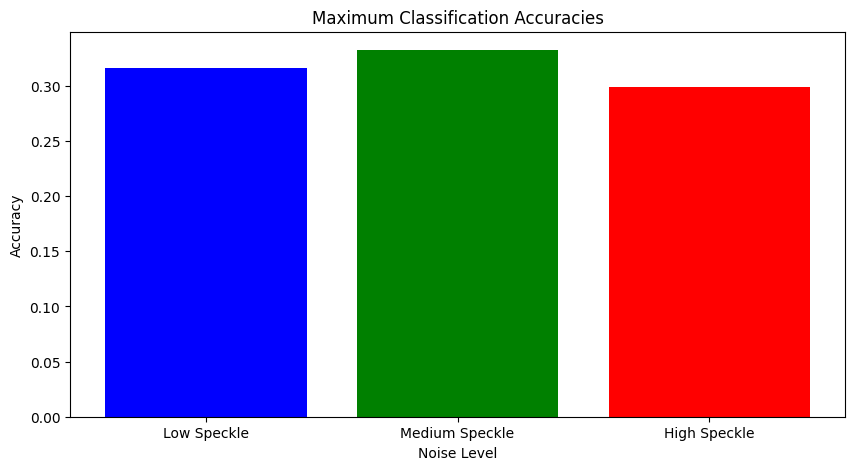

In [28]:
catgories = ['Low Speckle','Medium Speckle','High Speckle']
max_acc = [max_acc_low,max_acc_mid,max_acc_high]

plt.figure(figsize=(10,5))
plt.bar(catgories,max_acc,color=['blue','green','red'])
plt.title('Maximum Classification Accuracies')
plt.xlabel('Noise Level')
plt.ylabel('Accuracy')

plt.show()